In [1]:
import os
import pandas as pd
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
file_path = 'hypothetical_pump_failure_dataset.csv'

df = pd.read_csv(file_path)

In [4]:
df.shape

(1000, 6)

In [5]:
df.head()

,timestamp,vibration_level,temperature_C,pressure_PSI,flow_rate_m3h,failure
0,2024-01-01 00:00:00,0.549671,76.996777,93.248217,40.460962,0
1,2024-01-01 01:00:00,0.486174,74.623168,98.554813,45.698075,0
2,2024-01-01 02:00:00,0.564769,70.298152,92.075801,47.931972,0
3,2024-01-01 03:00:00,0.652303,66.765316,96.920385,59.438438,0
4,2024-01-01 04:00:00,0.476585,73.491117,81.063853,52.782766,0


## Missing vaues

In [8]:
df.isnull().sum()

timestamp          0
vibration_level    0
temperature_C      0
pressure_PSI       0
flow_rate_m3h      0
failure            0
dtype: int64

## Summary Statistics:

In [10]:
df.describe()

,vibration_level,temperature_C,pressure_PSI,flow_rate_m3h,failure
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.501933,70.354181,100.058342,49.906404,0.049000
std,0.097922,4.987272,9.834543,5.135663,0.215976
min,0.175873,55.298057,69.804878,35.352757,0.000000
25%,0.435241,66.968792,93.520004,46.312898,0.000000
50%,0.502530,70.315386,99.997492,50.000923,0.000000
75%,0.564794,73.644411,106.609153,53.334727,0.000000
max,0.885273,85.965538,139.262377,66.215465,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp        1000 non-null   object 
 1   vibration_level  1000 non-null   float64
 2   temperature_C    1000 non-null   float64
 3   pressure_PSI     1000 non-null   float64
 4   flow_rate_m3h    1000 non-null   float64
 5   failure          1000 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 47.0+ KB


## Class Imbalance:

In [19]:
df.failure.value_counts()

failure
0    951
1     49
Name: count, dtype: int64

There is a significant imbalance in the target variable, with 951 instances of no failure (label 0) and 49 instances of failure (label 1). This imbalance could impact model performance, so handling it during modeling is crucial.

## Correlation Matrix:

<Axes: >

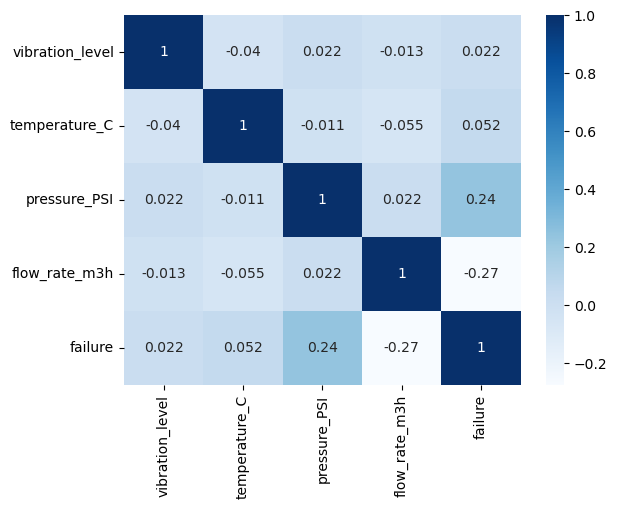

In [26]:
corr = df.iloc[:, 1:].corr()
sb.heatmap(corr, cmap="Blues", annot=True)

pressure, flow rate Level and Failure: Shows a moderate positive correlation, indicating that higher pressure levels may lead to pump failure.

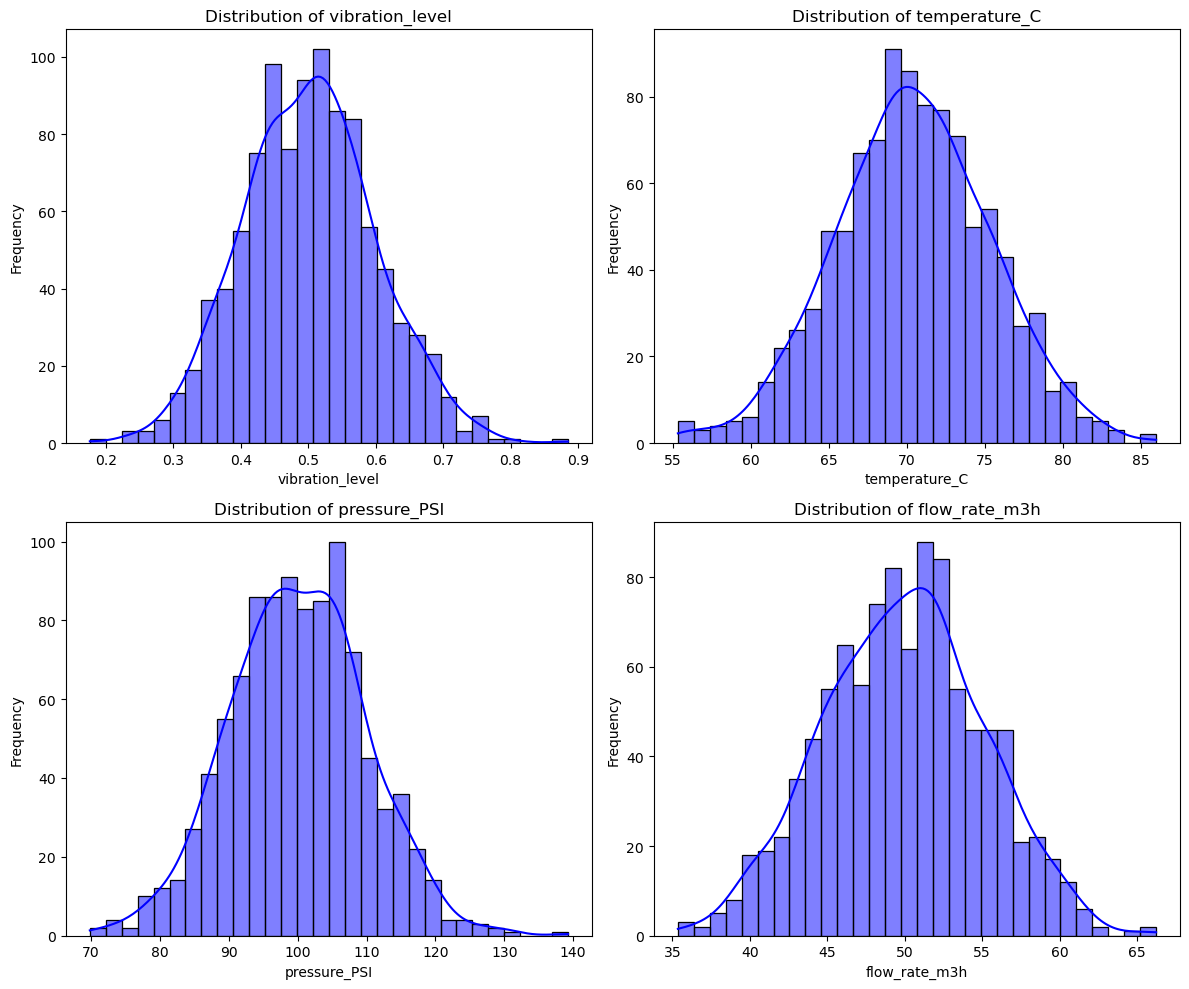

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['vibration_level', 'temperature_C', 'pressure_PSI', 'flow_rate_m3h']

plt.figure(figsize=(12, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Normalizing/Standardizing the features

In [31]:
df_norm = df.copy()
# df_temp = df.iloc[:, 1:]
cols_to_be_norm = df_norm.iloc[:, 1:5].columns.tolist()
print(cols_to_be_norm)

['vibration_level', 'temperature_C', 'pressure_PSI', 'flow_rate_m3h']


In [33]:
df_norm.describe()

,vibration_level,temperature_C,pressure_PSI,flow_rate_m3h,failure
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.501933,70.354181,100.058342,49.906404,0.049000
std,0.097922,4.987272,9.834543,5.135663,0.215976
min,0.175873,55.298057,69.804878,35.352757,0.000000
25%,0.435241,66.968792,93.520004,46.312898,0.000000
50%,0.502530,70.315386,99.997492,50.000923,0.000000
75%,0.564794,73.644411,106.609153,53.334727,0.000000
max,0.885273,85.965538,139.262377,66.215465,1.000000


In [35]:
scaler = MinMaxScaler()
df_norm[cols_to_be_norm] = scaler.fit_transform(df_norm[cols_to_be_norm])

In [37]:
df_norm

,timestamp,vibration_level,temperature_C,pressure_PSI,flow_rate_m3h,failure
0,2024-01-01 00:00:00,0.526922,0.707548,0.337521,0.165514,0
1,2024-01-01 01:00:00,0.437412,0.630150,0.413921,0.335204,0
2,2024-01-01 02:00:00,0.548204,0.489121,0.320641,0.407586,0
3,2024-01-01 03:00:00,0.671595,0.373922,0.390390,0.780414,0
4,2024-01-01 04:00:00,0.423895,0.593236,0.162099,0.564760,0
...,...,...,...,...,...,...
995,2024-02-11 11:00:00,0.417278,0.653875,0.445883,0.479204,0
996,2024-02-11 12:00:00,0.710312,0.475074,0.471837,0.137972,1
997,2024-02-11 13:00:00,0.547239,0.335618,0.255948,0.422703,0
998,2024-02-11 14:00:00,0.376387,0.452812,0.482840,0.740834,0


<Axes: xlabel='timestamp'>

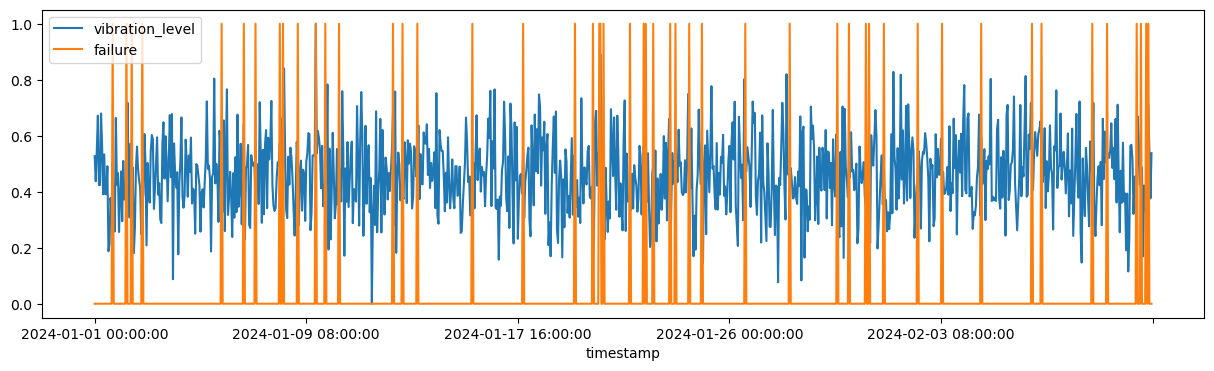

In [41]:
df_norm.plot(x='timestamp',y=['vibration_level', 'failure'], kind='line', figsize =(15,4))

<Axes: xlabel='timestamp'>

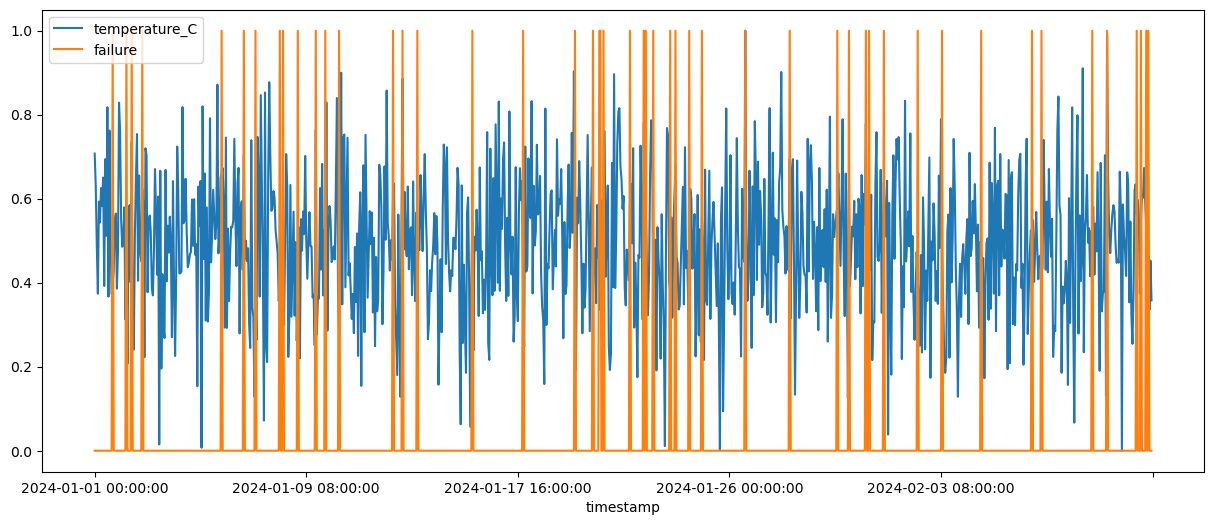

In [43]:
df_norm.plot(x='timestamp',y=[ 'temperature_C', 'failure'], kind='line', figsize =(15,6))

<Axes: xlabel='timestamp'>

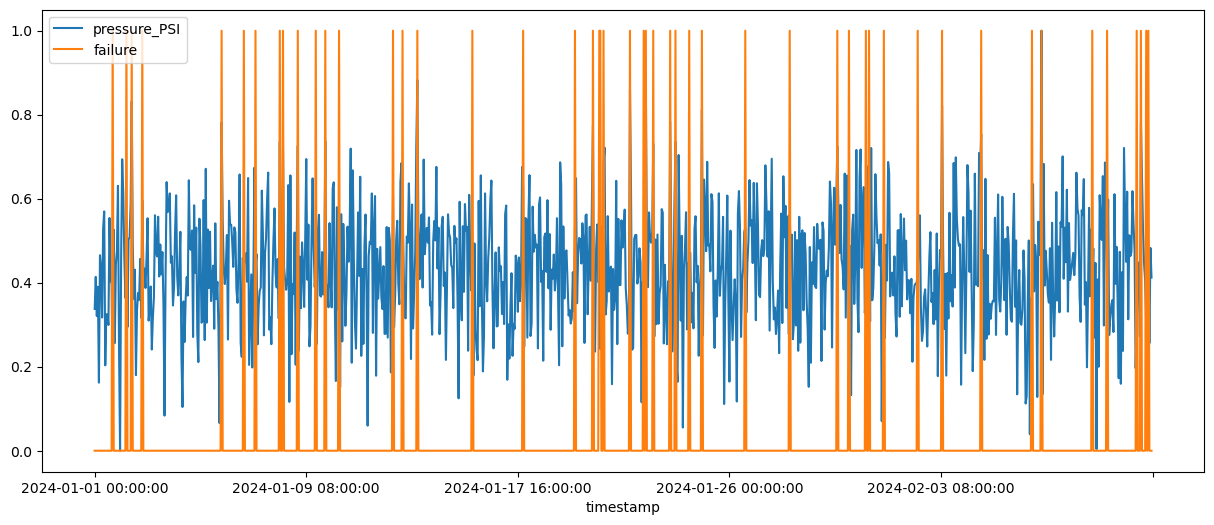

In [45]:
df_norm.plot(x='timestamp',y=[ 'pressure_PSI', 'failure'], kind='line', figsize =(15,6))

<Axes: xlabel='timestamp'>

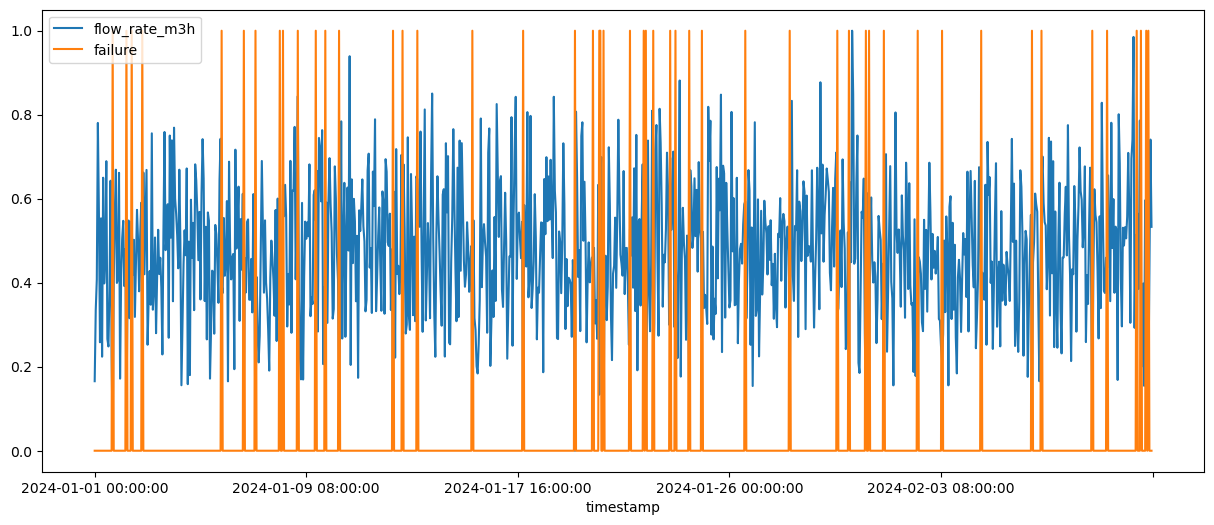

In [47]:
df_norm.plot(x='timestamp',y=[ 'flow_rate_m3h', 'failure'], kind='line', figsize =(15,6))

In [76]:
import keras
from keras.layers import LSTM, Dropout, Dense
import tensorflow as tf
import numpy as np

In [56]:
data = df_norm.copy()

In [71]:
X = data[cols_to_be_norm]
Y = data['failure']

sequence_length = 10
step = 1

X_local = list()
Y_local = list()

for start in range(0, len(data) - sequence_length, step):
    end = start + sequence_length
    X_local.append(X[start:end])
    Y_local.append(Y[end-1])

X_local = np.array(X_local)
Y_local = np.array(Y_local)

X_local.shape, Y_local.shape

((990, 10, 4), (990,))

In [74]:
model = keras.Sequential()
model.add(LSTM(100, input_shape = (10, 4)))
# model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy"
              , metrics=[keras.metrics.Precision(), keras.metrics.Recall()]
              , optimizer="adam")

model.summary()

C:\Users\ACER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          42,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,101 (164.46 KB)

 Trainable params: 42,101 (164.46 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
training_size = int(len(X_local) * 0.7)

X_train, y_train = X_local[:training_size], Y_local[:training_size]
X_test, y_test = X_local[training_size:], Y_local[training_size:]

X_train.shape, y_train.shape,X_test.shape, y_test.shape

((693, 10, 4), (693,), (297, 10, 4), (297,))

In [87]:
# X_train, y_train,X_test, y_test = train_test_split(X_local,Y_local, test_size=0.2)
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((792, 10, 4), (198, 10, 4), (792,), (198,))

In [90]:
model.fit(X_train, y_train, batch_size=64, epochs=50)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.5276 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2225 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1980 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1933 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2230 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1840 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2186 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2090 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1821 - precision_2: 0.0000e+

In [92]:
response = model.evaluate(X_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2163 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00  


In [94]:
response

[0.19677159190177917, 0.0, 0.0]

In [96]:
response = model.evaluate(X_test, y_test)
y_test_pred = np.where(model.predict(X_test) > 0.5, 1, 0)
report = classification_report(y_test,y_test_pred)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [104]:
from sklearn.metrics import classification_report

In [106]:
report = classification_report(y_test,y_test_pred)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [108]:
print(report)

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       281
         1.0       0.00      0.00      0.00        16

    accuracy                           0.95       297
   macro avg       0.47      0.50      0.49       297
weighted avg       0.90      0.95      0.92       297



In [130]:
data.head()

,timestamp,vibration_level,temperature_C,pressure_PSI,flow_rate_m3h,failure
0,2024-01-01 00:00:00,0.526922,0.707548,0.337521,0.165514,0.0
1,2024-01-01 01:00:00,0.437412,0.630150,0.413921,0.335204,0.0
2,2024-01-01 02:00:00,0.548204,0.489121,0.320641,0.407586,0.0
3,2024-01-01 03:00:00,0.671595,0.373922,0.390390,0.780414,0.0
4,2024-01-01 04:00:00,0.423895,0.593236,0.162099,0.564760,0.0


<Axes: xlabel='failure'>

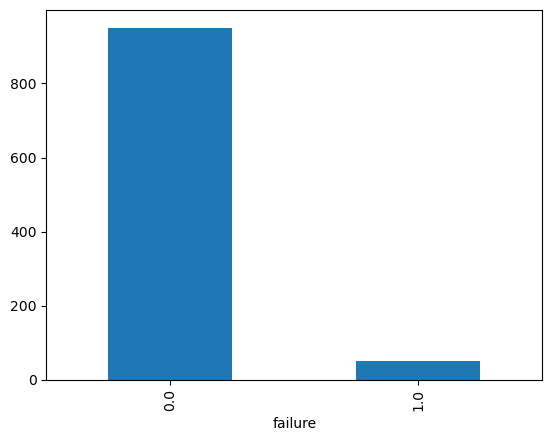

In [122]:
data.failure.value_counts().plot(kind = 'bar')

In [126]:
# In this case Using simpler metrics like accuracy_score can be misleading

In [134]:
X = data[cols_to_be_norm]
y = data['failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [136]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [138]:
model = XGBClassifier()
model.fit(X_train[['vibration_level']], y_train)
y_pred = model.predict(X_test[['vibration_level']])

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.50%


In [151]:
count_class_0, count_class_1 = data.failure.value_counts()
count_class_0, count_class_1

(951, 49)

In [153]:
df_class_0 = data[data['failure'] == 0]
df_class_1 = data[data['failure'] == 1]

In [159]:
df_class_0_under = df_class_0.sample(count_class_1)

In [161]:
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

<Axes: title={'center': 'Count (failure)'}, xlabel='failure'>

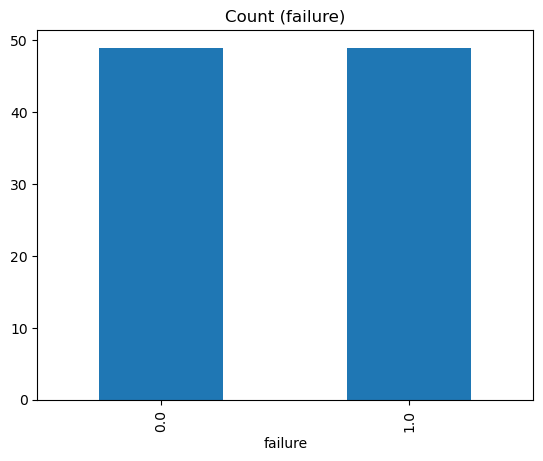

In [165]:
df_test_under.failure.value_counts().plot(kind='bar', title='Count (failure)')

In [167]:
df_test_under.shape

(98, 6)

In [181]:
df_test_under = df_test_under.reset_index(drop=True)

In [226]:
df_test_under = df_test_under.sample(frac = 1).reset_index(drop=True)

In [240]:
df_test_under = df_test_under.sort_values(by=['timestamp']).reset_index(drop=True)

In [242]:
X = df_test_under.iloc[:,1:5]
Y = df_test_under['failure']

sequence_length = 10
step = 1

X_local = list()
Y_local = list()

for start in range(0, len(df_test_under) - sequence_length, step):
    end = start + sequence_length
    X_local.append(X[start:end])
    Y_local.append(Y[end-1])

X_local = np.array(X_local)
Y_local = np.array(Y_local)

X_local.shape, Y_local.shape

((88, 10, 4), (88,))

In [244]:
model = keras.Sequential()
model.add(LSTM(100, input_shape = (10, 4)))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy"
              , metrics=[keras.metrics.Precision(), keras.metrics.Recall()]
              , optimizer="adam")

model.summary()

C:\Users\ACER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 100)                 │          42,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,101 (164.46 KB)

 Trainable params: 42,101 (164.46 KB)

 Non-trainable params: 0 (0.00 B)

In [250]:
training_size = int(len(X_local) * 0.7)

X_train, y_train = X_local[:training_size], Y_local[:training_size]
X_test, y_test = X_local[training_size:], Y_local[training_size:]

In [252]:
model.fit(X_train, y_train, batch_size=64, epochs=50)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.6827 - precision_4: 0.5600 - recall_4: 0.8750
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.6987 - precision_4: 0.4717 - recall_4: 0.7812
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.6934 - precision_4: 0.5424 - recall_4: 1.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.6945 - precision_4: 0.5254 - recall_4: 0.9688
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.6866 - precision_4: 0.5246 - recall_4: 1.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.6789 - precision_4: 0.5424 - recall_4: 1.0000
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.6898 - precision_4: 0.5246 - recall_4: 1.0000
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.6918 - precision_4: 0.5246 - recall_4: 1.0000
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.6938 - precision_4: 0.5254 - recall_4: 0.9688
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss:

In [254]:
response = model.evaluate(X_test, y_test)
y_test_pred = np.where(model.predict(X_test) > 0.5, 1, 0)
report = classification_report(y_test,y_test_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step - loss: 0.6926 - precision_4: 0.4444 - recall_4: 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [256]:
print(report)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        15
         1.0       0.44      1.00      0.62        12

    accuracy                           0.44        27
   macro avg       0.22      0.50      0.31        27
weighted avg       0.20      0.44      0.27        27



In [258]:
y_test

array([1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 1., 1., 1.])

In [265]:
X = data[cols_to_be_norm]
y = data['failure']

In [272]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_resampled, y_resampled = smote.fit_resample(X, y)

In [276]:
X_resampled

,vibration_level,temperature_C,pressure_PSI,flow_rate_m3h,failure
0,0.526922,0.707548,0.337521,0.165514,0.0
1,0.437412,0.630150,0.413921,0.335204,0.0
2,0.548204,0.489121,0.320641,0.407586,0.0
3,0.671595,0.373922,0.390390,0.780414,0.0
4,0.423895,0.593236,0.162099,0.564760,0.0
...,...,...,...,...,...
1897,0.658078,0.647770,0.449340,0.131924,1.0
1898,0.551272,0.356398,0.366916,0.120154,1.0
1899,0.358741,0.617045,0.588298,0.124838,1.0
1900,0.384322,0.411753,0.699874,0.098184,1.0


In [278]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
995    0.0
996    1.0
997    0.0
998    0.0
999    0.0
Name: failure, Length: 1000, dtype: float64